# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('human_body_temperature.csv')

In [2]:
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import sem
%matplotlib inline
sns.set()

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# 1. Is the distribution of body temperatures normal?

To use the normal model, we must meet some assumptions and conditions. The Central Limit Theorem assumes the following:
1. Randomization Condition: The data must be sampled randomly.
2. Independence Assumption: The sample values must be independent of each other. 
3. 10% Condition: When the sample is drawn without replacement (usually the case), the sample size, n, should be no more than 10% of the population.
4. Sample Size Assumption: The sample size must be sufficiently large. Although the Central Limit Theorem tells us that we can use a Normal model to think about the behavior of sample means when the sample size is large enough, it does not tell us how large that should be. If the population is very skewed, you will need a pretty large sample size to use the CLT, however if the population is unimodal and symmetric, even small samples are acceptable. So think about your sample size in terms of what you know about the population and decide whether the sample is large enough. In general a sample size of 30 is considered sufficient if the sample is unimodal (and meets the 10% condition).

### Answer: Yes, the distribution of body temperatures is normal as it meets all of the above conditions and also passed all of the following tests. 
. The plots below shows the data is normally distributed.    
. The D’Agostino’s K^2 Test shows the p value of 0.2587479863488254 that is greater than the threshold α=0.05 confirm that our sample was likely drawn from a Gaussian distribution.       
. The Shapiro-Wilk test also shows the p value > α.       
. The Anderson Darling rest also shows the p value > α.     

In [6]:
mean_temp = np.mean(df.temperature)
mean_temp

98.24923076923078

In [7]:
std_temp = np.std(df.temperature)
std_temp

0.7303577789050377

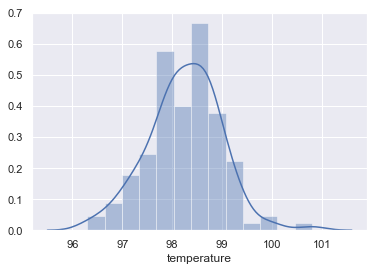

In [8]:
# Histogram
sns.distplot(df['temperature'], hist=True, kde=True,label='Temperature')

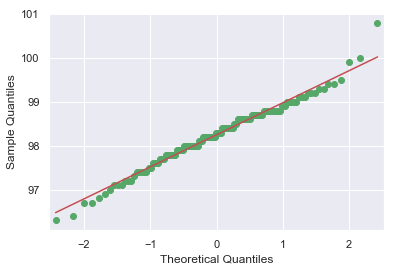

In [9]:
# Quantile-Quantile Plot
qqplot(df.temperature, line='s', color = 'g')
plt.show()

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

In [10]:
# D’Agostino’s K^2 Test
stat, p = scipy.stats.normaltest(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


In [11]:
# Shapiro-Wilk test
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


In [12]:
# Anderson Darling Test
result = anderson(df.temperature)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.765, data looks normal (fail to reject H0)
2.500: 0.892, data looks normal (fail to reject H0)
1.000: 1.061, data looks normal (fail to reject H0)


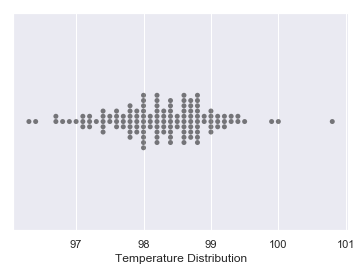

In [13]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(df.temperature, color='black', alpha=0.5)

# Label the axes
_ = plt.xlabel('Temperature Distribution')
# Show the plot
plt.show()


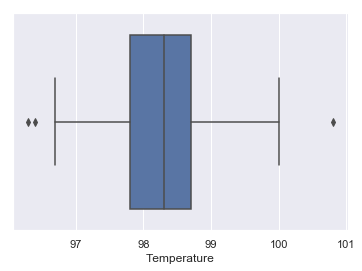

In [14]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(df.temperature)
# Label the axes
_ = plt.xlabel('Temperature')
# Show the plot
plt.show()

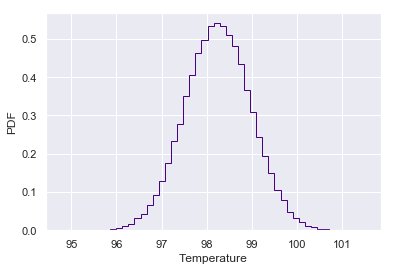

In [15]:
samp_temp = np.random.normal(mean_temp, std_temp, size=100000)
# Plot the PDF and label axes
plt.hist(samp_temp, bins=50, density=True, histtype='step',color='indigo')
xlabel = plt.xlabel('Temperature')
ylabel = plt.ylabel('PDF')
# Show the plot
plt.show()

# 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [16]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

# Answer: Yes, the sample size is large and Yes, the observations are independent.
. n = 130 which staisfies n >= 30 normal condition of atleast 30 observations.          
. n <= 10% of total population which satisfies independent condition.

# 3. Is the true population mean really 98.6 degrees F?
a. First, try a bootstrap hypothesis test.      
b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡
t
  or  𝑧
z
  statistic?      
c. Now try using the other test. How is the result be different? Why?     

# Answer:

Set Hypothesis Test:                
Ho: µ = 98.6 degrees (Mean temperature of the population is 98.6 degrees)              
Ha: µ ≠ 98.6 degrees (Mean temperature of the population is different from 98.6 degrees)      

I would use a one sample test as we are comparing a dataset with a single value of 98.6.         

As the sample size is greater than 30 we will use z statistic.          

As the population standard deviation is not known t statistic could also be used by using sample standard deviation.             
With t statistic we try to approximate the standard deviation and increase the chance of type II error.      

In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
#Function to calculate bootstrap replicates.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

# Create the shifted datasets
shifted_mean_temp = df.temperature - mean_temp + 98.6
# Draw bootstrap replicates
shifted_bs_replicates = draw_bs_reps(shifted_mean_temp, np.mean, 10000)
# Calculate p
p = np.sum(shifted_bs_replicates <= mean_temp) / 10000
print('Calculated Significance Value p = '+str(p))
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('p < alpha, Reject H0 and accept Ha')

Calculated Significance Value p = 0.0
p < alpha, Reject H0 and accept Ha


In [18]:
stests.ztest(df.temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [19]:
scipy.stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?         
What do you notice? What does this tell you about the difference in application of the  𝑡
t
  and  𝑧
z
  statistic?       

# Answer:
. We need to use the t statistic as our sample size of 10 is less than 30.        
. p value for the t statistic is higher than the z statistic.

In [20]:
# Draw a small sample of size 10
small_sample = df.temperature.sample(10)
small_sample

54     98.2
25     98.0
14     97.8
53     98.6
101    98.5
106    97.0
95     96.8
50     98.9
68     98.7
52     98.5
Name: temperature, dtype: float64

In [21]:
# Perform z statistic
stests.ztest(small_sample, value=98.6)

(-2.2164529671207776, 0.02666049559847188)

In [22]:
# Perform t statistic
scipy.stats.ttest_1samp(small_sample, 98.6)

Ttest_1sampResult(statistic=-2.2164529671207776, pvalue=0.053875004286083)

# 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

# Answer:
. We calculate the confidence interval of 95% using frequentist and bootstrap approaches.      
. Any value lying out of the calculated confidence interval range should be considered abnormal.

In [23]:
# Confidence Interval by using Standard Error of Mean
sem = scipy.stats.sem(df.temperature)
print('Standard Error of Mean: '+str(sem))
print('Confidence Interval: '+str(mean_temp-sem)+' : '+str(mean_temp+sem))

Standard Error of Mean: 0.06430441683789102
Confidence Interval: 98.18492635239289 : 98.31353518606866


In [24]:
# Confidence Interval using numpy
np.percentile(df.temperature,[2.5,97.5])

array([96.7225, 99.4775])

In [25]:
import statsmodels.stats.api as sms
conf = sms.DescrStatsW(df.temperature).tconfint_mean()
conf

(98.12200290560803, 98.3764586328535)

In [26]:
stats.norm.interval(0.95, loc=mean_temp, scale=std_temp)

(96.81775582674824, 99.68070571171332)

In [27]:
# Confidence Interval - Bootstrap approach
bs_replicates = draw_bs_reps(df.temperature, np.mean, size = 10000)
int_below, int_above = np.percentile(bs_replicates, 2.5), np.percentile(bs_replicates, 97.5)
print('Confidence Interval: '+ str(int_below)+' : '+ str(int_above))

Confidence Interval: 98.12615384615384 : 98.3753846153846


In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

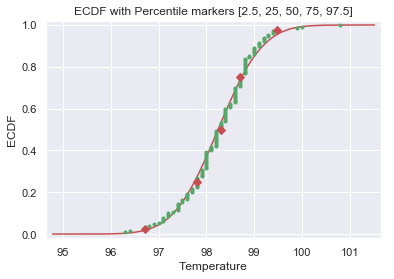

In [29]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(df.temperature, percentiles)

# Create an ECDF from real data: x, y
x, y = ecdf(df.temperature)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(samp_temp)

# Overlay the plots
plt.plot(x_theor, y_theor, color='r')
plt.plot(x, y, marker='.', linestyle='none', color='g')
plt.plot(ptiles_vers, percentiles/100, marker='D', color='r',linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.title('ECDF with Percentile markers [2.5, 25, 50, 75, 97.5]')
# Show the plot
plt.show()


# 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?        
Write a story with your conclusion in the context of the original problem.

# Answer:
. Hypothesis test:         
           Ho: µ1 = µ2 (Mean Male Body Temperature = Mean Female Body Temperature)             
           Ha: µ1 ≠ µ2 (Mean Male Body Temperature ≠ Mean Female Body Temperature)                  
. The p value obtained by two sample bootstrap approach is less than alpha of 0.05.             
. As this is statistically significant we can reject Ho and say that mean body temperatures of       
males and females vary.


. We proved with several normal tests the underlyting body temperature data follows Gaussian distribution and all the conditions for the Central Limit Theorem were satisfied. With a p value of 0.0 we proved that the mean body temperature is not alway 98.6. We used z statistic when the sample size was greater than 30 and we used t statistic when the sample was less than 30. We calculated the confidence interval of 95%. From the above 95% confidence interval marked ECDF plot we see some outliers. The outliers could indicate some kind of sickness in those individuals. Also from the plots by gender below show that male and female body temperaure means are different and that male body temperatures tend to be lower than female body temperatures.                

In [30]:
# Create the sample population for males
male = df[df['gender']=='M'].temperature
male.head()

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [31]:
# Create the sample population for females
female = df[df['gender']=='F'].temperature
female.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

In [32]:
# Calculate the mean used to shift both the datasets
boot = pd.concat([male,female])
boot_mean = np.mean(boot)
boot_mean

98.24923076923079

In [33]:
# Mean - male
df1_mean = np.mean(male)
df1_mean

98.1046153846154

In [34]:
# Mean - female
df2_mean = np.mean(female)
df2_mean

98.39384615384613

In [35]:
# Mean difference between male and female 
diff_mean = df1_mean - df2_mean
diff_mean

-0.289230769230727

In [36]:
# Normal test - male
scipy.stats.normaltest(male)

NormaltestResult(statistic=0.8911999666950503, pvalue=0.6404399074569123)

In [37]:
# Normal test - female
scipy.stats.normaltest(female)

NormaltestResult(statistic=4.735438112908399, pvalue=0.09369419389856404)

In [38]:
# Create the shifted datasets
shifted_df1 = male - df1_mean + boot_mean
shifted_df2 = female - df2_mean + boot_mean
n=10000

In [39]:
# Draw bootstrap replicates
df1_bs_reps = draw_bs_reps(shifted_df1, np.mean, n)
df2_bs_reps = draw_bs_reps(shifted_df2, np.mean, n)
print(df1_bs_reps)
print(df2_bs_reps)

[98.26923077 98.24923077 98.2        ... 98.23692308 98.20923077
 98.22307692]
[98.28       98.32       98.35076923 ... 98.27846154 98.29076923
 98.16615385]


In [40]:
# Calculate difference in the replicates
df_bs_reps_diff = df1_bs_reps - df2_bs_reps
print(df_bs_reps_diff)

[-0.01076923 -0.07076923 -0.15076923 ... -0.04153846 -0.08153846
  0.05692308]


In [41]:
# For difference in mean as the test statistic under the assumption that null hypothesis is true
# Calculate the significance value p and print 
p = np.sum(df_bs_reps_diff <= diff_mean) / n
print('Calculated Significance Value p = '+str(p))

Calculated Significance Value p = 0.0116


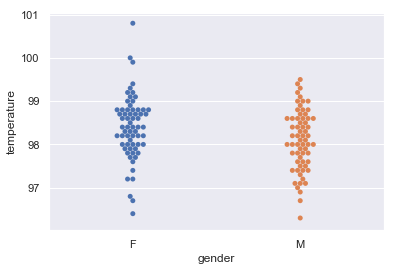

In [42]:
# Bee swarm plot
sns.swarmplot(x='gender',y='temperature', data=df)

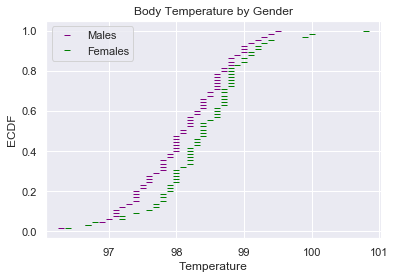

In [43]:
# ECDF - male and female body temperatures
x_m ,y_m = ecdf(male)
x_f ,y_f = ecdf(female)
plt.plot(x_m,y_m, marker = '_', linestyle = 'none', color='purple')
plt.plot(x_f,y_f, marker = '_', linestyle = 'none', color='green')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.title('Body Temperature by Gender')
plt.legend(('Males', 'Females'))